<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [2]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = pd.read_csv(r'C:\Users\Joy\Desktop\Data Science\Jonathan_Gitrepo\DAT-06-24\projects\required\project-housing-data\data\boston_data.csv')


In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
boston.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
boston.rename(columns={'MEDV':'PRICE'}, inplace =True)

In [7]:

#feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','LSTAT']
#X = boston.iloc[:, :-1]
#y = boston['PRICE']

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [9]:
boston.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'PRICE'],
      dtype='object')

In [10]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

total_null = []

feature_names = ['CRIM',' ZN ','INDUS ','CHAS','NOX','RM','AGE','DIS','RAD', 'TAX','PTRATIO','LSTAT']

for item in feature_names:
    is_null = boston[item].isnull().sum()
    total_null.append(is_null)

In [11]:
total_null

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
boston.CRIM.isnull().sum()

0

In [13]:
boston.dtypes

CRIM       float64
 ZN        float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object

In [14]:
boston.shape

(506, 13)

In [15]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [16]:
boston.index

RangeIndex(start=0, stop=506, step=1)

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [17]:
from sklearn.linear_model import LinearRegression
# data is not standardized. Also did not use pd.get_dummies since there was no categorical data

In [36]:
lr = LinearRegression()
#X = boston[feature_names]
y = boston[['PRICE']]
lr.fit(X,y)
lr.score(X,y)

0.7343070437613076

In [127]:
lr = LinearRegression()
X = boston.loc[:, ['CRIM',' ZN ','INDUS ','RM','PTRATIO','LSTAT']]
y = boston[['PRICE']]
lr.fit(X,y)
lr.score(X,y)

0.6818516297008643

In [40]:
x_std = (X - X.mean()) / X.std()

In [45]:
x_std.head()

,CRIM,ZN,INDUS,RM,PTRATIO,LSTAT
0,-0.419367,0.284548,-1.286636,0.413263,-1.457558,-1.074499
1,-0.416927,-0.487240,-0.592794,0.194082,-0.302794,-0.491953
2,-0.416929,-0.487240,-0.592794,1.281446,-0.302794,-1.207532
3,-0.416338,-0.487240,-1.305586,1.015298,0.112920,-1.360171
4,-0.412074,-0.487240,-1.305586,1.227362,0.112920,-1.025487


In [41]:
lr.fit(x_std,y)
lr.score(x_std,y)

0.6818516297008642

In [175]:
#X = boston.loc[:, [['CRIM',' ZN ','INDUS ','RM','PTRATIO','LSTAT']]

Score was 0.7343 with all the parameters used 
Score drops to 0.68 with a subset of parameters 

In [128]:
?sns.pairplot

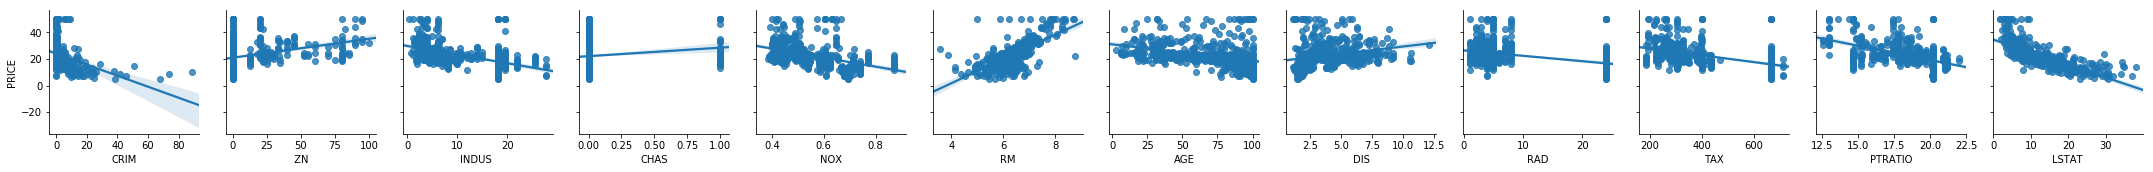

In [21]:
import seaborn as sns
sns.pairplot(boston, x_vars=feature_names, y_vars='PRICE', kind='reg');

In [179]:
#sns.pairplot(boston)

In [22]:
X.head()

,CRIM,ZN,INDUS,RM,PTRATIO,LSTAT
0,0.00632,18.0,2.31,6.575,15.3,4.98
1,0.02731,0.0,7.07,6.421,17.8,9.14
2,0.02729,0.0,7.07,7.185,17.8,4.03
3,0.03237,0.0,2.18,6.998,18.7,2.94
4,0.06905,0.0,2.18,7.147,18.7,5.33


In [114]:
boston['predictions'] = lr.predict(x_std)

In [24]:
lr.coef_

array([[-0.06658451, -0.00661101,  0.01368214,  4.62861691, -0.91615717,
        -0.54693283]])

In [25]:
lr.intercept_

array([17.43554127])

In [116]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE,predictions,residual
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,15.857609,32.443234
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,13.379242,48.540172
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,19.618490,39.197492
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,17.928500,36.495444
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,18.906879,48.166459


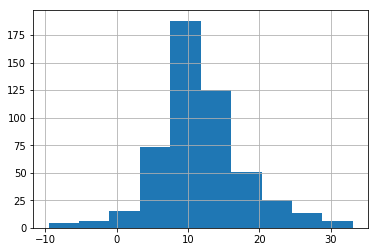

In [117]:
boston['predictions'].hist()

In [123]:
coeffs = pd.DataFrame({
    'Variable': X.columns,
    'Weight'  : lr.coef_[0]
}).sort_values(by='Weight', ascending=False)
coeffs

,Variable,Weight
3,RM,5.407568
1,ZN,-0.019316
2,INDUS,-0.039657
0,CRIM,-0.080913
5,LSTAT,-0.502050
4,PTRATIO,-0.855465


In [124]:
boston['residual'] = boston['PRICE'] - boston['predictions']

In [125]:
boston['residual'].describe()

count    506.000000
mean      10.775748
std        6.115139
min       -8.861010
25%        8.101544
50%       10.844207
75%       13.123040
max       48.432656
Name: residual, dtype: float64

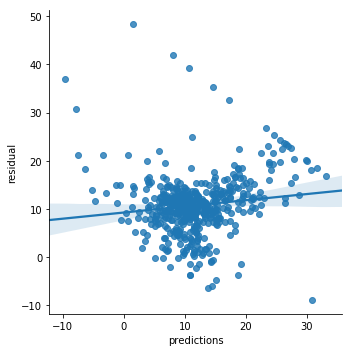

In [126]:
import seaborn as sns
sns.lmplot('predictions', 'residual', data=boston)

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

# 70/30 Split - test on 30% data 

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [77]:
X_train.shape


(354, 6)

In [78]:
y_train.shape

(354, 1)

In [79]:
X_test.shape

(152, 6)

In [80]:
y_test.shape

(152, 1)

In [82]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
print("Training score: ", lr.score(X_train, y_train), "Test score: ", lr.score(X_test, y_test))

Training score:  0.6932314569886414 Test score:  0.625953979125921


# 90/10 split test on 10%

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2019)

In [85]:
print("Training score: ", lr.score(X_train, y_train), "Test score: ", lr.score(X_test, y_test))

Training score:  0.6829286852606578 Test score:  0.6307424736197582


## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)

In [90]:
np.mean(scores)

0.6526984587089392

In [104]:
range_scores = []

fold_list = [5,6,7,8,9,10]

for num in fold_list:
    score = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=num)
    range_scores.append(np.mean(score))

In [99]:
range_scores

[0.652696242157558,
 0.6662707826484885,
 0.6614889159866869,
 0.6542759104307678,
 0.6585744300627114,
 0.6526984587089392]

In [105]:
range_scores = []

fold_list = [5,6,7,8,9,10]

for num in fold_list:
    score = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=num)
    range_scores.append(np.std(score))

In [109]:
range_scores

[0.08642321740214834,
 0.08787380693949254,
 0.10880962856498026,
 0.13144428768428595,
 0.1290938663842241,
 0.1411771604993662]

In [ ]:
#Answer: Mean score is highest for 6 folds and seems to be the optimal score 
#"To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. 
#Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, 
#as these values have been shown empirically to yield test error rate estimates that suffer 
#neither from excessively high bias nor from very high variance."

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [8]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        22:28:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Improvement based on above 

In [131]:
lr = LinearRegression()
X2 = boston.loc[:, ['CRIM',' ZN ','RM','RAD','PTRATIO','LSTAT']]
y = boston[['PRICE']]
lr.fit(X2,y)
lr.score(X2,y)

0.6836527336351447

In [133]:
x2_std = (X2 - X2.mean()) / X2.std()
lr.fit(x2_std,y)
lr.score(x2_std,y)

0.6836527336351446

In [138]:
boston['predictions2'] = lr.predict(x2_std)

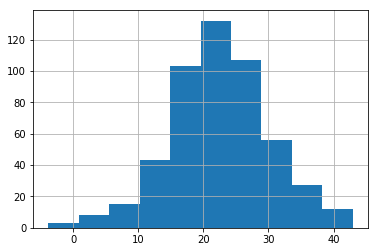

In [139]:
boston['predictions2'].hist()

In [142]:
boston['residual2'] = boston['PRICE'] - boston['predictions2']

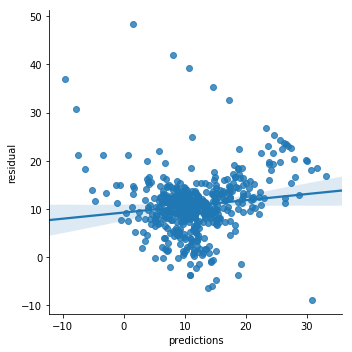

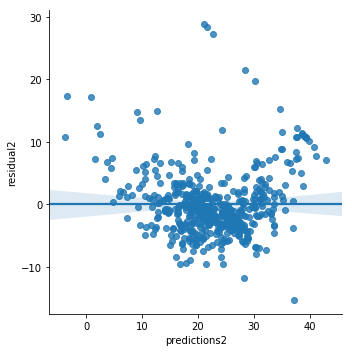

In [145]:
import seaborn as sns
sns.lmplot('predictions', 'residual', data=boston)
sns.lmplot('predictions2', 'residual2', data=boston)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1E842D780>]],
      dtype=object)

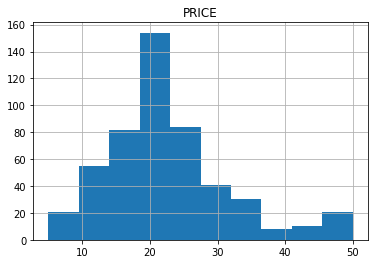

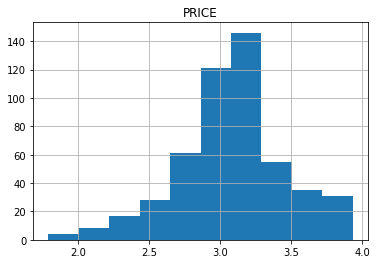

In [148]:
y_log = np.log1p(y)
y.hist()
y_log.hist()

In [149]:
lr.fit(x2_std,y_log)
lr.score(x2_std,y_log)

0.743716864488349

In [153]:
boston['predictions3'] = lr.predict(x2_std)
boston['residual3'] = boston['PRICE'] - boston['predictions3']

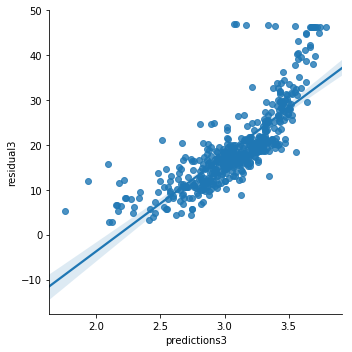

In [156]:
import seaborn as sns
sns.lmplot('predictions3', 'residual3', data=boston)

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
